In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

## Data cleaning

In [4]:
df = pd.read_csv('Attrition original.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
# no of nulls
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [6]:
df.drop(columns = ['NumCompaniesWorked'], inplace = True)

In [7]:
#removing null values
df.dropna(inplace = True)

In [8]:
df.shape

(4319, 28)

## Data Analysis

### Are employees satisfied with the overall environmenent?

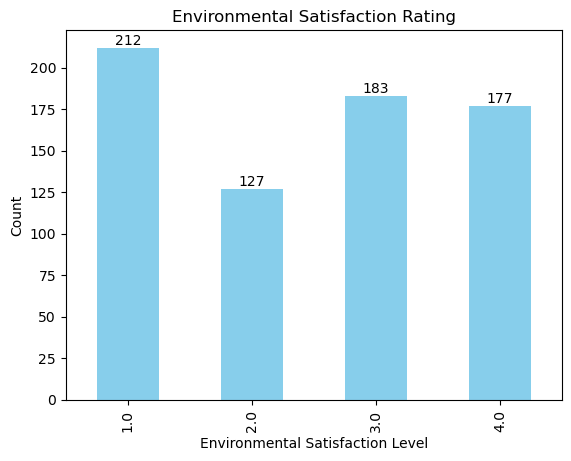

In [11]:
attrition_yes = df[df['Attrition'] == 'Yes']

env_satisfaction_counts = attrition_yes['EnvironmentSatisfaction'].value_counts().sort_index()
fig, ax = plt.subplots()
env_satisfaction_counts.plot(kind='bar', color='skyblue')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Plot the bar chart
plt.title('Environmental Satisfaction Rating')
plt.xlabel('Environmental Satisfaction Level')
plt.ylabel('Count')
plt.savefig('env_rating',bbox_inches='tight', pad_inches=0.1)
plt.show()

Rating Scale: The ratings are rated on a scale from 1 to 4, where:
1 indicates the highest level of satisfaction,
4 represents the lowest level of satisfaction.

large number of employees who left the company had a satisfaction rating of 1, it suggests that **environmental satisfaction** alone **might not be the primary reason for attrition**.

### Are employees satisfied with the Job?

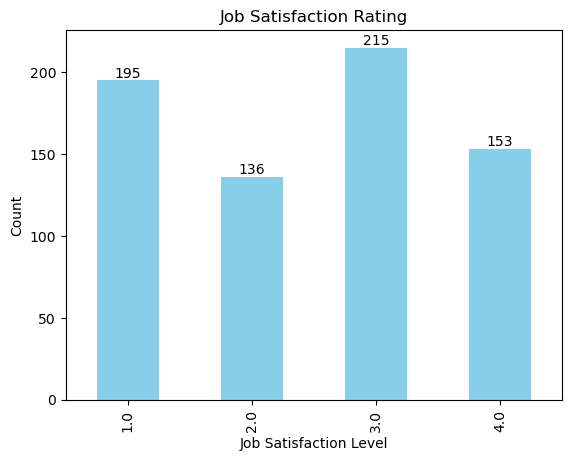

In [15]:
#job satisfaction
job_satisfaction_counts = attrition_yes['JobSatisfaction'].value_counts().sort_index()
fig, ax = plt.subplots()
job_satisfaction_counts.plot(kind='bar', color='skyblue', ax=ax)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Set titles and labels
plt.title('Job Satisfaction Rating')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')

# Save and show the plot
plt.savefig('job_rating.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Most of those who left had lower satisfaction ratings (3), it indicates a **possible link between dissatisfaction with the job and higher attrition rates**.

### What about the Work-life balance?

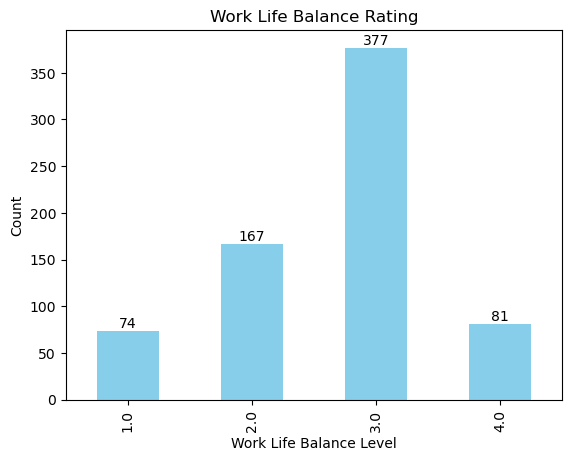

In [18]:
# work life balance
WorkLifeBalance_counts = attrition_yes['WorkLifeBalance'].value_counts().sort_index()
fig, ax = plt.subplots()
WorkLifeBalance_counts.plot(kind='bar', color='skyblue')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Plot the bar chart
plt.title('Work Life Balance Rating')
plt.xlabel('Work Life Balance Level')
plt.ylabel('Count')
plt.savefig('work_life_rating.png',bbox_inches='tight', pad_inches=0.1)
plt.show()

Work-life balance received the most ratings of 3 (on a scale where 1 is the best), it suggests that the majority of employees view their **work-life balance** as **below average or moderate**, but not extremely poor or excellent.

Room for Improvement: A rating of 3 likely indicates that employees are not fully satisfied with their work-life balance but do not find it unbearable either. There could be certain challenges in balancing work and personal life, which may be affecting overall employee satisfaction and productivity.

Potential Risk: If a large portion of employees view work-life balance as suboptimal, it might lead to higher stress levels, burnout, or even attrition in the long run, especially if there are no interventions to address the issues causing dissatisfaction.

Actionable Suggestion: Investigating the specific factors contributing to this moderate rating, such as workload, flexibility, or time management, could help improve employee well-being.


#### Test to check if there’s a relationship between Years with Current Manager and Attrition

In [21]:
df['Attrition_num'] = df['Attrition'].map({'Yes':1,'No':0})
manager_correlation = df['Attrition_num'].corr(df['YearsWithCurrManager'])
print(f"Correlation: {manager_correlation}")

Correlation: -0.156343492192736


A correlation coefficient of -0.156343492 indicates a weak negative relationship between Years with Current Manager and Attrition.

What This Means:
* Negative Correlation: The negative sign means that as the number of Years with Current Manager increases, the likelihood of Attrition (employees leaving) slightly decreases. In other words, employees who have spent more time with their current manager are slightly less likely to leave.

* Weak Relationship: Since the correlation is close to 0, the relationship between these two variables is weak. It suggests that Years with Current Manager may have some influence on attrition, **but it is not a strong or decisive factor**.

#### Is there a relationship between Years since last Promotion and Attrition?

In [24]:
promotion_correlation = df['Attrition_num'].corr(df['YearsSinceLastPromotion'])
print(f"Correlation: {promotion_correlation}")

Correlation: -0.03106357791055809


A correlation of -0.0311 suggests that YearsSinceLastPromotion and Attrition are almost independent of each other, meaning the time since the **last promotion does not strongly influence whether an employee leaves or stays**.

#### Is there a relationship between Years at the company and Attrition?

In [27]:
yrs_at_comp_correlation = df['Attrition_num'].corr(df['YearsAtCompany'])
print(f"Correlation: {yrs_at_comp_correlation}")

Correlation: -0.1342305667492418


no relation.

#### Is there a relationship between Total working Years and Attrition?

In [30]:
yrs_at_comp_correlation = df['Attrition_num'].corr(df['TotalWorkingYears'])
print(f"Correlation: {yrs_at_comp_correlation}")

Correlation: -0.16931840422836061


No significant relation. 

### Heatmap showing Correlation

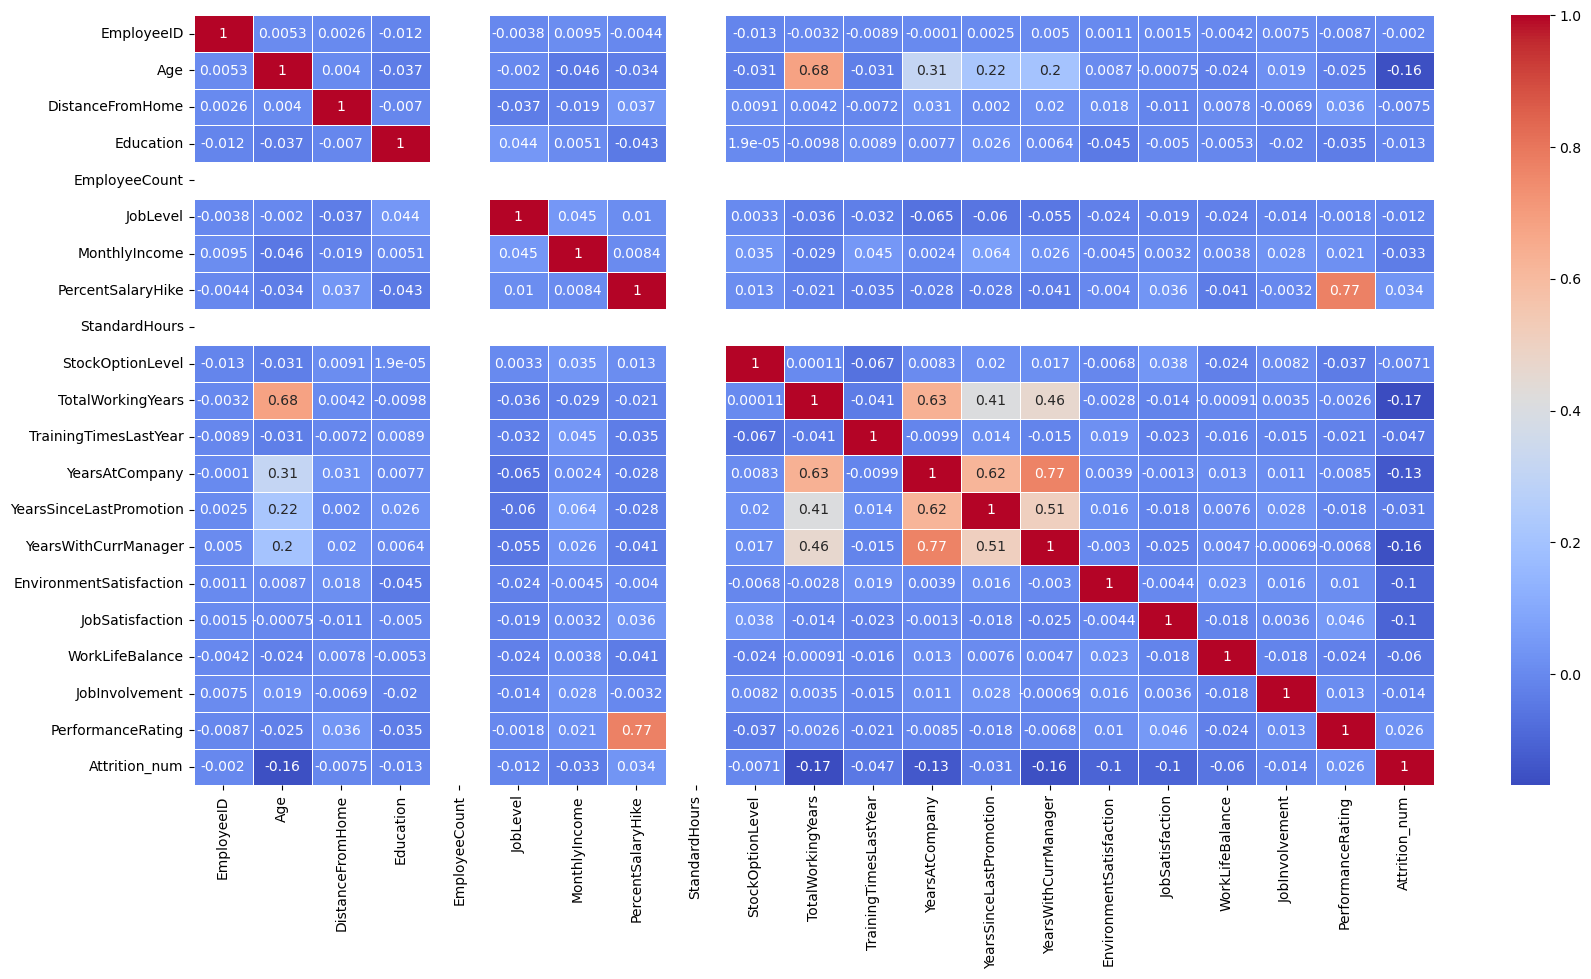

In [33]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix on numerical columns only
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

### Relation between Years at the company and Years since last promotion
the heatmap shows a positive correlation = 0.62

the moderate positive correlation suggests that **the longer employees stay at the company, the longer it has been since their last promotion**. However, this is not a perfect relationship, and other factors could be influencing promotion patterns.

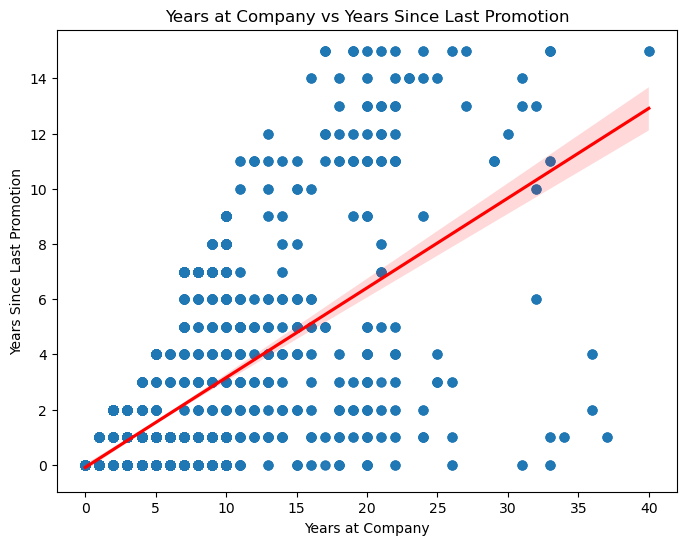

In [35]:
plt.figure(figsize=(8,6))
sns.regplot(x='YearsAtCompany', y='YearsSinceLastPromotion', data=df, scatter_kws={'s':40}, line_kws={'color':'red'})
plt.title('Years at Company vs Years Since Last Promotion')
plt.xlabel('Years at Company')
plt.ylabel('Years Since Last Promotion')
plt.savefig('promotion.png',bbox_inches='tight', pad_inches=0.1)
plt.show()

### Age group with the most Attrition?

In [37]:
def categorize_age(age):
    if age <= 26:
        return '18-26'
    elif age <= 34:
        return '27-34'
    elif age <= 43:
        return '35-43'
    elif age <= 51:
        return '44-51'
    else:
        return '52-60'

# Apply the function to the Age column to create Age Group
df['Age Group'] = df['Age'].apply(categorize_age)


In [38]:
# Filter the data for Attrition = 'Yes'
attrition_yes = df[df['Attrition'] == 'Yes']

# Group by Age Group and count the occurrences of 'Yes'
age_group = attrition_yes.groupby('Age Group').size().reset_index(name='Count')
age_group


,Age Group,Count
0,18-26,164
1,27-34,278
2,35-43,132
3,44-51,77
4,52-60,48


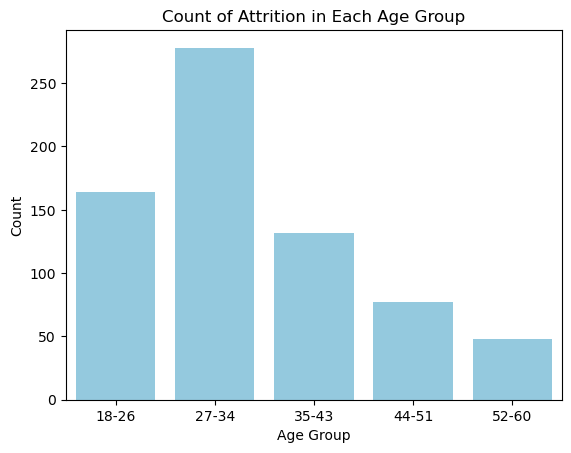

In [39]:
sns.barplot(data=age_group, x='Age Group', y='Count', color='skyblue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Attrition in Each Age Group')
plt.savefig('age_group.png',bbox_inches='tight', pad_inches=0.1)
plt.show()


Age group of **27-34** has the most attrition.

**Possible Interpretations:**

**Career Development Needs:**
Employees in this age group might be looking for more career advancement opportunities, promotions, or new challenges that they aren’t finding in their current roles.

**Work-Life Balance**:
This age range often corresponds with significant life changes such as starting families or buying homes. These changes might affect job satisfaction and lead to higher attrition if work-life balance or flexibility is lacking.

**Job Satisfaction**:
It could indicate that employees in this age group are less satisfied with their jobs compared to other groups. This dissatisfaction might be due to various factors such as compensation, job role, or workplace environment.

**Competitive Job Market:**
This demographic might be more active in the job market, possibly because they are more established in their careers and are seeking better opportunities or offers.


### Which gender is more prone to leaving?

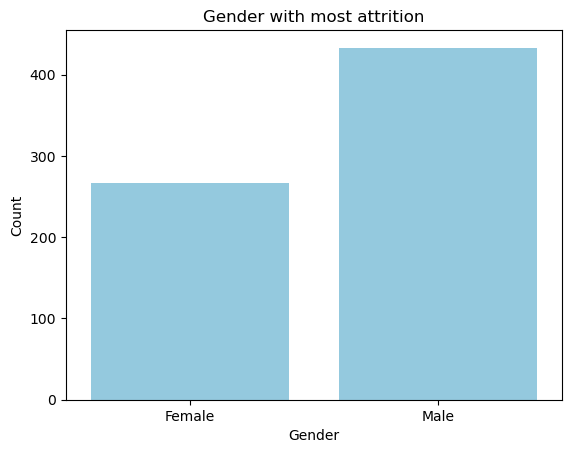

In [42]:
gender_grp= attrition_yes.groupby('Gender').size().reset_index(name='Count')
sns.barplot(data=gender_grp, x='Gender', y='Count', color='skyblue')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender with most attrition')
plt.savefig('gender',bbox_inches='tight', pad_inches=0.1)
plt.show()

Males are more prone to leaving

### Which department has the most attrition?

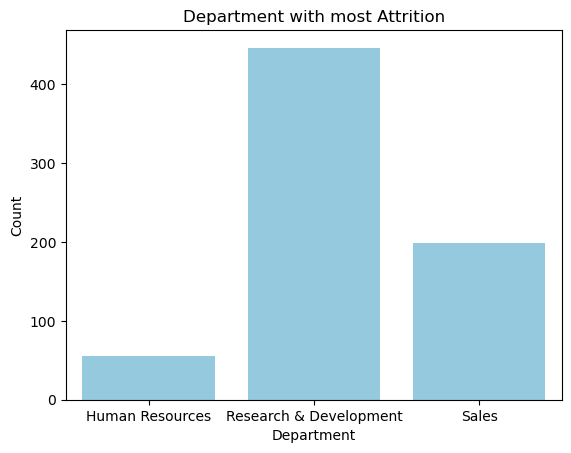

In [45]:
dpt_grp= attrition_yes.groupby('Department').size().reset_index(name='Count')
sns.barplot(data=dpt_grp, x='Department', y='Count', color='skyblue')

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department with most Attrition')
plt.show()

Research and development has most

### Does distance from home affect attrition?

In [48]:
def categorize_distance(distance):
    if distance <= 6:
        return '1-6'
    elif distance <= 12:
        return '7-12'
    elif distance <= 18:
        return '13-18'
    elif distance <= 24:
        return '19-24'
    else:
        return '25-30'

# Apply the function to the Age column to create Age Group
df['DistanceGroup'] = df['DistanceFromHome'].apply(categorize_distance)

attrition_yes = df[df['Attrition'] == 'Yes']

distance_group = attrition_yes.groupby('DistanceGroup').size().reset_index(name='Count')
distance_group


,DistanceGroup,Count
0,1-6,318
1,13-18,79
2,19-24,63
3,25-30,42
4,7-12,197


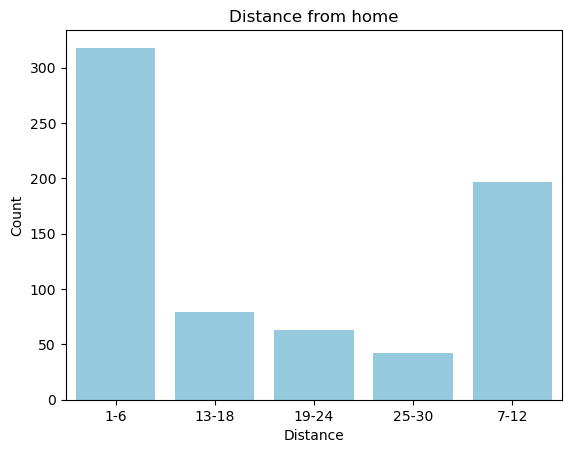

In [49]:
sns.barplot(data=distance_group, x='DistanceGroup', y='Count', color='skyblue')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Distance from home')
plt.savefig('distance.png',bbox_inches='tight', pad_inches=0.1)
plt.show()

Understanding the reasons behind higher attrition for employees living within 1-12 miles from home can help you address specific issues and improve retention in that geographic area.

Employees living within this range may experience issues related to their commute, such as traffic congestion or insufficient transportation options. Even a short commute can become a significant factor if it is inconvenient or stressful.

### Which job level has more attrition?

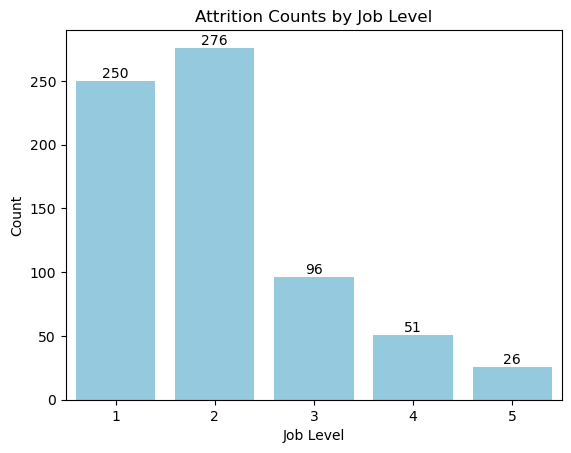

In [112]:
# Create the bar plot
job_level = attrition_yes.groupby('JobLevel').size().reset_index(name='Count')
ax = sns.barplot(data=job_level, x='JobLevel', y='Count', color='skyblue')

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

# Add labels and title
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.title('Attrition Counts by Job Level')

# Show the plot
plt.savefig('job_level.png', bbox_inches='tight', pad_inches=0.1)
plt.show()



Attrition is highest among employees at job levels 1 and 2. 

* The job might not meet the expectations of entry-level employees, causing them to leave in search of better opportunities

* Entry-level and junior roles might have lower compensation compared to industry standards or the employees’ expectations, leading to higher attrition.

### Top 5 Job Roles with the highest Attrition

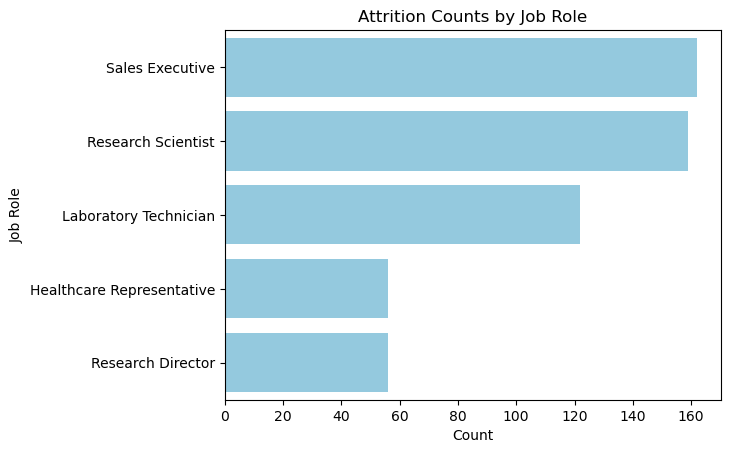

In [55]:
job_role= attrition_yes.groupby('JobRole').size().sort_values(ascending = False).reset_index(name='Count').head(5)
sns.barplot(data=job_role, y='JobRole', x='Count', color='skyblue')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.title('Attrition Counts by Job Role')
plt.savefig('job_roles.png',bbox_inches='tight', pad_inches=0.1)
plt.show()

Sales Executive has the most attrition followed by Research Scientist. 

### Does Marital Status affect attrition?

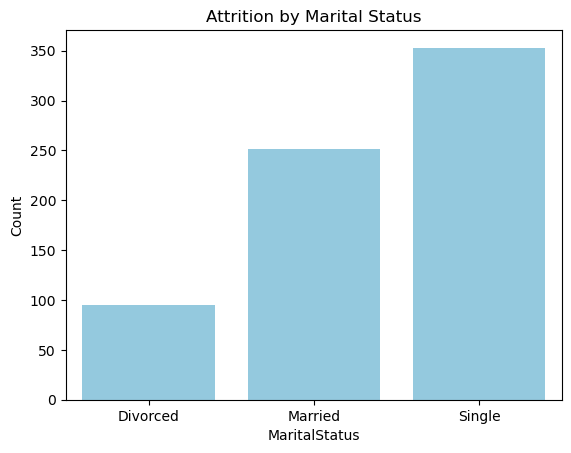

In [58]:
marital_status= attrition_yes.groupby('MaritalStatus').size().reset_index(name='Count')
sns.barplot(data=marital_status, x='MaritalStatus', y='Count', color='skyblue')

# Add labels and title
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('Attrition by Marital Status')
plt.savefig('marital_status.png',bbox_inches='tight', pad_inches=0.1)
plt.show()

Most of the employees who left are single.

**Possible Interpretations:**

* Single employees might be more mobile and open to relocating or changing jobs compared to those with family responsibilities. They might also be more likely to seek new opportunities as they may have fewer personal constraints.

* Single employees might have different career goals or expectations compared to married or divorced employees. They might prioritize career advancement or new experiences, leading to higher turnover.

* The company might have benefits or policies that are more attractive to married or divorced employees, such as family-related benefits. Single employees might not find these benefits as relevant or valuable.

### Could low salary be the reason for attrition?
Perform Statistical Testing: Conducting a non-parametric test like the **Mann-Whitney U test** to determine if the **difference in medians salaries** of those who left and those who stayed is statistically significant.

#### separating the two groups (those who left and those who stayed)

In [62]:
df_left = df[df['Attrition'] == 'Yes']
df_stayed = df[df['Attrition'] == 'No']

<Axes: ylabel='MonthlyIncome'>

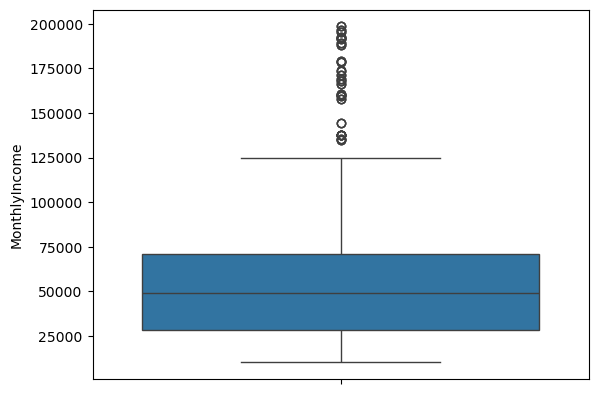

In [63]:
sns.boxplot(df_left['MonthlyIncome'])

<Axes: ylabel='MonthlyIncome'>

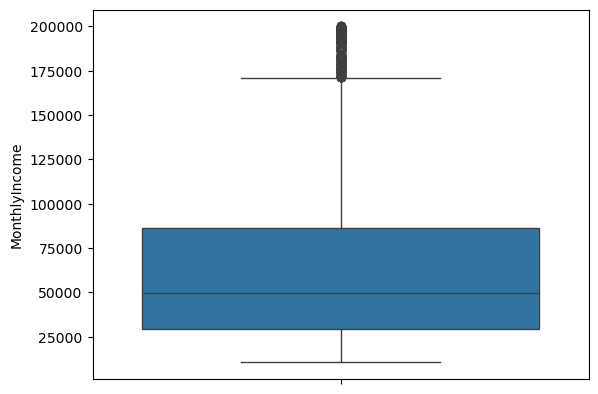

In [64]:
sns.boxplot(df_stayed['MonthlyIncome'])

#### handling outliers in salaries of those who left

In [66]:
# find iqr
left_per25 = df_left['MonthlyIncome'].quantile(0.25)
left_per75 = df_left['MonthlyIncome'].quantile(0.75)
left_iqr = left_per75 - left_per25 

l_upper_limit = left_per75 + 1.5 * left_iqr
l_lower_limit = left_per25 - 1.5 * left_iqr

#Finging outliers
df_left[df_left['MonthlyIncome'] > l_upper_limit]  #greater than upper limit
df_left[df_left['MonthlyIncome'] < l_lower_limit]  #lesser than lower limit

#capping outliers
df_left_cap = df_left.copy()

df_left_cap['MonthlyIncome'] = np.where(
    df_left_cap['MonthlyIncome'] > l_upper_limit,
    l_upper_limit,
    np.where(
        df_left_cap['MonthlyIncome'] < l_lower_limit, 
        l_lower_limit,
        df_left_cap['MonthlyIncome']
    )
)

<Axes: ylabel='MonthlyIncome'>

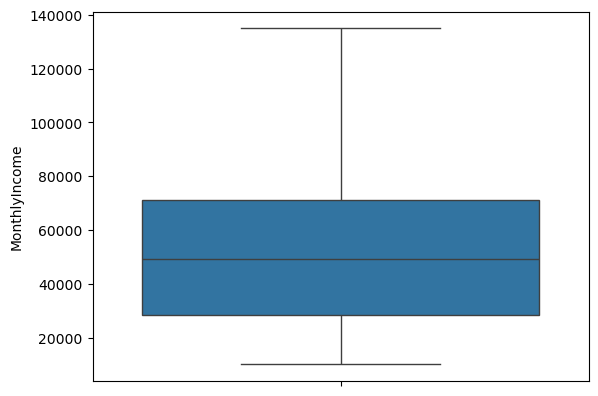

In [67]:
sns.boxplot(df_left_cap['MonthlyIncome'])

#### handling outliers in the salaries of those who stayed

In [69]:
# find iqr
stay_per25 = df_left['MonthlyIncome'].quantile(0.25)
stay_per75 = df_left['MonthlyIncome'].quantile(0.75)
stay_iqr = stay_per75 - stay_per25 

s_upper_limit = stay_per75 + 1.5 * stay_iqr
s_lower_limit = stay_per25 - 1.5 * stay_iqr

#Finging outliers
df_stayed[df_stayed['MonthlyIncome'] > s_upper_limit]  #greater than upper limit
df_stayed[df_stayed['MonthlyIncome'] < s_lower_limit]  #lesser than lower limit

#capping outliers
df_stayed_cap = df_stayed.copy()

df_stayed_cap['MonthlyIncome'] = np.where(
    df_stayed_cap['MonthlyIncome'] > s_upper_limit,
    s_upper_limit,
    np.where(
        df_stayed_cap['MonthlyIncome'] < s_lower_limit, 
        s_lower_limit,
        df_stayed_cap['MonthlyIncome']
    )
)

<Axes: ylabel='MonthlyIncome'>

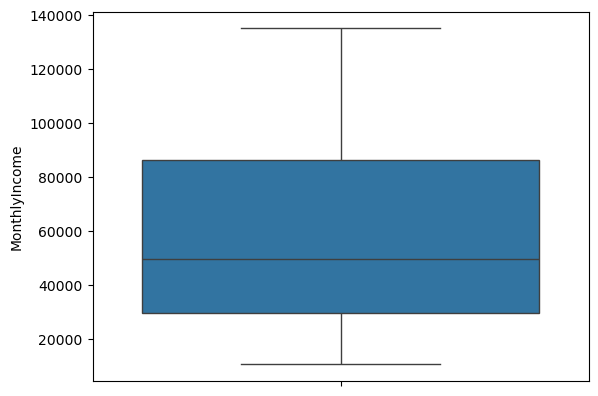

In [70]:
sns.boxplot(df_stayed_cap['MonthlyIncome'])

#### Differnece in median salaries of both the groups

In [72]:
median_left = df_left_cap['MonthlyIncome'].median()
median_stayed = df_stayed_cap['MonthlyIncome'].median()
print(f'median_left: {median_left}, median_stayed: {median_stayed}')

median_left: 49080.0, median_stayed: 49410.0


The median salary for employees who stayed (49,410) is slightly higher than that for employees who left (49,080). **The difference is $330, which is relatively small**. Meaning salary might not be the reason for employee attrition. 

#### Performing the Mann-Whitney U test

In [75]:
stat, p_value = mannwhitneyu(df_left_cap['MonthlyIncome'], df_stayed_cap['MonthlyIncome'])

print(f'p-value: {p_value}')

p-value: 0.09767579548257364


With a p-value of 0.0976, the evidence is **not strong enough** to conclude a significant difference in median salaries between those who left and those who stayed at the 0.05 significance level.